In [1]:
# This notebook plays with the MNIST digits dataset, for which I 
# import the MNIST digits dataset from keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(images, labels), (testX, testY) = mnist.load_data()

trainX = np.array(images).astype('float32') / 255
trainY = np.array(labels)

testX = np.array(testX).astype('float32') / 255
testY= np.array(testY)

2023-04-24 09:16:15.391543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 0.890   perceptron, 0 hidden layers.
# 0.8966  linear 1-layer classifier
# 0.952   for default MLPClassifier, hidden = (100,) 
# 0.9659   MLP  hidden= (400,) logistic 
# 0.973   2-layer MLP  hidden = (400,200) default relu activation



In [3]:
# Nitish_Gangwar     06 Oct, 2021 
# Applying Convolutional Neural Network on mnist dataset
# https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/
    
import numpy as np
import keras
#from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [4]:
# This is a method to perform one-hot encoding...
y_train = keras.utils.to_categorical(trainY)
y_test = keras.utils.to_categorical(testY)

In [5]:
trainX = trainX.reshape((-1,28,28))
img_rows, img_cols=28, 28
inpx = (1, img_rows, img_cols)
Y = y_train.T

In [6]:
img_rows, img_cols=28, 28
x_train =trainX
x_test = testX
print("Shape x_train", x_train.shape)
# k.image_data_format() == "channels_last"
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Shape x_train (60000, 28, 28)


In [7]:
k.image_data_format()

'channels_last'

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [9]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

2023-04-24 09:16:22.723173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 123s 1s/step - loss: 2.4195 - accuracy: 0.0987
Epoch 2/12
120/120 [==============================] - 104s 870ms/step - loss: 2.4108 - accuracy: 0.0987
Epoch 3/12
120/120 [==============================] - 92s 769ms/step - loss: 2.4021 - accuracy: 0.0987
Epoch 4/12
 39/120 [========>.....................] - ETA: 1:28 - loss: 2.3917 - accuracy: 0.0972

KeyboardInterrupt: 

In [18]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train[0:1000,:], y_train[0:1000], epochs=60, batch_size=500)

Epoch 1/60
2/2 [==============================] - 2s 1s/step - loss: 1.1822 - accuracy: 0.6600
Epoch 2/60
2/2 [==============================] - 2s 784ms/step - loss: 1.0247 - accuracy: 0.7180
Epoch 3/60
2/2 [==============================] - 2s 783ms/step - loss: 1.1402 - accuracy: 0.6660
Epoch 4/60
2/2 [==============================] - 2s 833ms/step - loss: 1.0605 - accuracy: 0.7020
Epoch 5/60
2/2 [==============================] - 2s 770ms/step - loss: 0.9662 - accuracy: 0.7670
Epoch 6/60
2/2 [==============================] - 2s 869ms/step - loss: 1.0284 - accuracy: 0.7500
Epoch 7/60
2/2 [==============================] - 2s 1s/step - loss: 0.9590 - accuracy: 0.7710
Epoch 8/60
2/2 [==============================] - 2s 943ms/step - loss: 0.9339 - accuracy: 0.7480
Epoch 9/60
2/2 [==============================] - 2s 1s/step - loss: 0.9472 - accuracy: 0.7410
Epoch 10/60
2/2 [==============================] - 2s 1s/step - loss: 0.9435 - accuracy: 0.7410
Epoch 11/60
2/2 [==============

In [ ]:
X.shape, y_train.shape

In [19]:
model.fit(x_train, y_train, epochs=60, batch_size=500)

Epoch 1/60
120/120 [==============================] - 104s 870ms/step - loss: 0.5778 - accuracy: 0.8172
Epoch 2/60
106/120 [=========================>....] - ETA: 11s - loss: 0.4973 - accuracy: 0.8415

KeyboardInterrupt: 

In [22]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_checkpoint',
 '_checkpoint_dependencies',
 '_

In [23]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 7.43371546e-02,  3.94358784e-01,  3.80075164e-02,
           -7.39932656e-02,  8.34506527e-02,  3.77693623e-01,
           -9.48646665e-02, -2.93396115e-02, -9.96412635e-02,
           -1.24646567e-01, -8.40851292e-02, -7.70677254e-02,
           -1.19944438e-01, -4.10452783e-01,  4.82998379e-02,
           -3.84376168e-01,  1.44975007e-01,  1.10209668e-02,
           -1.09161459e-01,  5.32759428e-02, -1.39916599e-01,
            2.69532412e-01,  4.32602465e-01, -1.02131344e-01,
            3.30336876e-02, -6.98176399e-03,  2.93207794e-01,
            9.45000630e-03,  1.03357293e-01,  3.51738930e-01,
           -1.19027019e-01,  1.89553015e-02]],
 
         [[-1.13096669e-01,  4.80025351e-01,  2.32567471e-02,
           -1.15290239e-01, -1.16946347e-01,  4.19318199e-01,
           -7.11265653e-02, -8.34644213e-03,  1.29802346e-01,
           -8.92234743e-02,  4.16077226e-02, -2.01937724e-02,
         

In [25]:
model.weights[0].shape

TensorShape([3, 3, 1, 32])

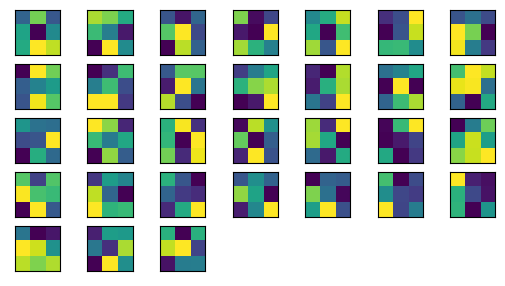

In [29]:
for i in range(1,32):
    plt.subplot(7,7, i)
    fig=plt.imshow(model.weights[0][:,:,0,i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
        


In [ ]:
# And it turns out the indexes for the row- and column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

In [ ]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

In [ ]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

In [ ]:
pca.components_.shape

In [ ]:
plt.scatter(pca.components_[0,:], pca.components_[1,:])

In [ ]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels100)

In [ ]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [ ]:
pca50.components_.shape

In [ ]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)